In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #to build Decision Tree Classifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   #to encode all the categorical and numerical values
from sklearn import tree
import matplotlib.pyplot as plt #to visualize the tree
from sklearn.model_selection import train_test_split #to split the data into training and testing data
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report  #to build a classification report

A1. For the data table provided below, calculate the entropy associated with each attribute / feature at the root node. Using this information, identify the first feature that you’d select for constructing the decision tree. Use Information Gain as the impurity measure to identify the root node.‘buys_computer’ is the class label.

In [ ]:
data1 = pd.read_excel(r"C:\Amrita cse\5th Semester\Machine Learning\Lab\Lab 4\lab4_data.xlsx")
df = pd.DataFrame(data1)
df

,age,income,student,credit_rating,buys_compter
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
#CALCULATING ENTROPY OF EACH FEATURE
def calculate_entropy(data):
    # Count the occurrences of each class
    classCounts = data['buys_compter'].value_counts()
    # Calculate the entropy
    entropy = 0
    total_samples = len(data)
    for count in classCounts:
        probability = count / total_samples
        entropy = entropy - probability * np.log2(probability)
    return entropy

def calculate_root_entropy(data, features):
    root_entropy = calculate_entropy(data)
    feature_entropies = {}
    for feature in features:
        unique_values = data[feature].unique()
        feature_entropy = 0
        for value in unique_values:
            subset = data[data[feature] == value]
            feature_entropy += (len(subset) / len(data)) * calculate_entropy(subset)
        feature_entropies[feature] = feature_entropy

    return root_entropy, feature_entropies
# Specify the list of features (attributes)
features = ['age', 'income', 'student','credit_rating','buys_compter']
# Calculate root entropy and entropies for each feature
root_entropy, feature_entropies = calculate_root_entropy(df, features)
# Print the results
print(f"Root Entropy: {root_entropy}")
for feature, entropy in feature_entropies.items():
    print(f"Entropy for {feature}: {entropy}")

Root Entropy: 0.9402859586706311
Entropy for age: 0.6935361388961918
Entropy for income: 0.9110633930116763
Entropy for student: 0.7884504573082896
Entropy for credit_rating: 0.8921589282623617
Entropy for buys_compter: 0.0


In [ ]:
import numpy as np
import pandas as pd

# Function to calculate entropy
def calculate_entropy(data):
    class_counts = data['buys_compter'].value_counts()
    entropy = 0
    total_samples = len(data)
    for count in class_counts:
        probability = count / total_samples
        entropy -= probability * np.log2(probability)
    return entropy

# Function to calculate information gain
def calculate_information_gain(root_entropy, feature_entropy):
    information_gain = root_entropy - feature_entropy
    return information_gain

df = pd.DataFrame(data1)

# Calculate root entropy
root_entropy = calculate_entropy(df)

# Calculate feature entropies
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for feature in features:
    unique_values = df[feature].unique()
    feature_entropy = 0
    for value in unique_values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset)
    feature_entropies[feature] = feature_entropy
    information_gains[feature] = calculate_information_gain(root_entropy, feature_entropy)

# Calculate information gain for each feature
information_gains = {feature: calculate_information_gain(root_entropy, entropy) for feature, entropy in feature_entropies.items()}

# Print the information gains
for feature, gain in information_gains.items():
    print(f"Information Gain for {feature}: {gain:.4f}")

# Select the feature with the highest information gain as the root node
root_node = max(information_gains, key=information_gains.get)

print(f"The root node is: {root_node} with information gain {information_gains[root_node]:.4f}")


Information Gain for age: 0.2467
Information Gain for income: 0.0292
Information Gain for student: 0.1518
Information Gain for credit_rating: 0.0481
Information Gain for buys_compter: 0.9403
The root node is: buys_compter with information gain 0.9403


A2. Create a Decision Tree for the above data. Get the depth of the constructed tree

In [ ]:
#splitting the data into features and target variables
#splitting the dataset into features is known as independent variables
#target variables is known as variable or label
#this is typically used to model training and model evaluation that helps in the predictions of the model
X = df.drop('buys_compter',axis=1) #axis=1 is to access the columns of the dataset
y = df['buys_compter']

xEncoded = pd.get_dummies(X,columns=['age', 'income', 'student', 'credit_rating']) #pd.get_dummies is used to do one-hot encoding in python
#here one-hot encoding is performed to convert the categorical values into binary values

#splitting of code into train and set using train_test_split
X_train,X_test,y_train,y_test = train_test_split(xEncoded,y,test_size=0.2)

#creating and fitting the decsion tree classifier. Using the training values to make the decision tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


RequiredAccuracyTrain = model.score(X_train,y_train)
print("The accuracy of train model is: ",RequiredAccuracyTrain * 100,"%" )

RequiredAccuracyTest = model.score(X_test,y_test)
print("The accuracy of test model is: ",RequiredAccuracyTest * 100,"%" )

print("The depth of the tree is: ",model.get_depth())

The accuracy of train model is:  100.0 %
The accuracy of test model is:  33.33333333333333 %
The depth of the tree is:  5


A3. Visualize the constructed tree with plot_tree() command.

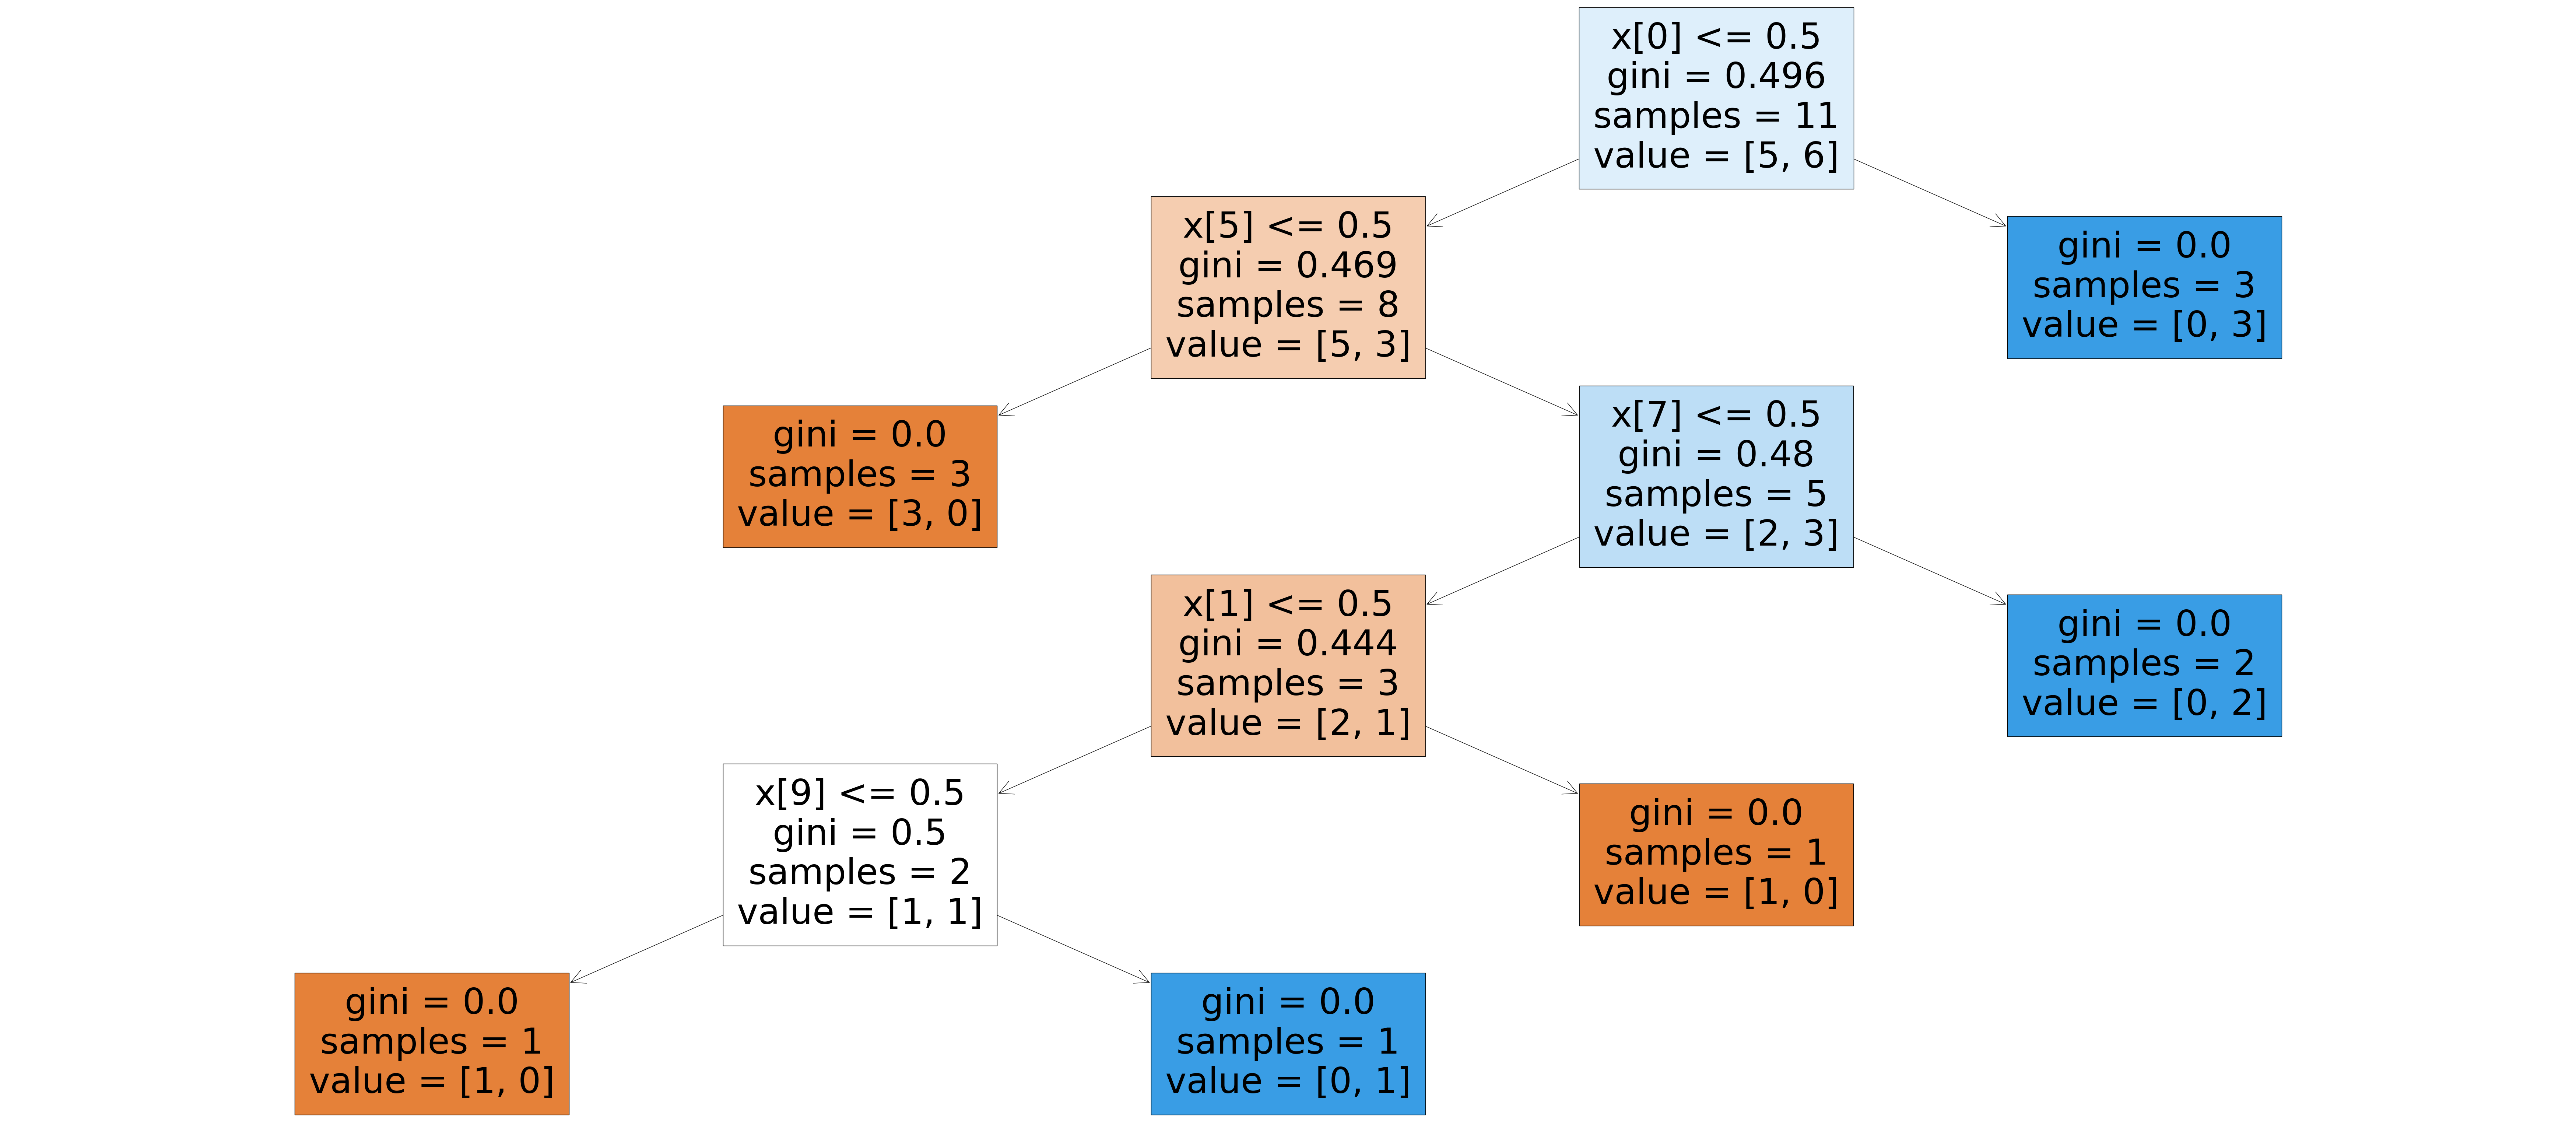

In [ ]:
plt.figure(figsize=(90,40))
plot_tree(model,filled=True)
plt.show()